In [610]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# plt.style.use('ggplot') 

basepath = os.path.join(os.getcwd(), 'bigd', 'trypandas/')
df1 = pd.read_csv(basepath + 'titanic.csv')
# print(df1.at[4,3])

df2 = df1.groupby(['PClass', 'Sex', 'Survived'])['Age'].min()
print(df2)
print(df2.unstack(1))
print(df2.unstack(0))
# print(df1.loc[:5, ['Name', 'Age', 'Survived']])
# print(df1.mean())
# print(df1.loc[df1.Age <10, ['Name', 'Age']])
# avgAgePerClass = df1.groupby(['PClass'])['Age'].mean()

# avgAgePerClass.plot(kind='bar')
# print (avgAgePerClass)
# count = df1['Age'].value_counts()
# count.iloc[:10].plot(kind='bar')
# count[:10].plot(figsize=(15, 5), kind='bar')
# df1.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count').plot(figsize=(10, 5))



PClass  Sex     Survived
*       male    0             NaN
1st     female  0            2.00
                1           14.00
        male    0           18.00
                1            0.92
2nd     female  0           18.00
                1            1.00
        male    0           14.00
                1            0.80
3rd     female  0            1.50
                1            0.17
        male    0            0.33
                1            0.83
Name: Age, dtype: float64
Sex              female   male
PClass Survived               
*      0            NaN    NaN
1st    0           2.00  18.00
       1          14.00   0.92
2nd    0          18.00  14.00
       1           1.00   0.80
3rd    0           1.50   0.33
       1           0.17   0.83
PClass            *    1st   2nd   3rd
Sex    Survived                       
female 0        NaN   2.00  18.0  1.50
       1        NaN  14.00   1.0  0.17
male   0        NaN  18.00  14.0  0.33
       1        NaN   0.92   0.8 

In [6]:
dates = pd.date_range('20130101', periods=5)
dates



NameError: name 'pd' is not defined

In [7]:
s = pd.Series([1,3,5,np.nan,8], index=dates)
s



NameError: name 'pd' is not defined

In [340]:
df1 = pd.DataFrame([np.random.randint(0,50, size=5) for i in range(5)], index=dates, columns=list('ABCDE'))

df1

,A,B,C,D,E
2013-01-01,39,17,9,26,38
2013-01-02,48,13,21,49,20
2013-01-03,27,31,14,20,11
2013-01-04,13,0,48,22,16
2013-01-05,24,43,28,14,6


In [341]:
df1.dtypes

A    int64
B    int64
C    int64
D    int64
E    int64
dtype: object

In [375]:
df1.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00
A,39,48,27,13,24
B,17,13,31,0,43
C,9,21,14,48,28
D,26,49,20,22,14
E,38,20,11,16,6


In [343]:
df1.sort_values(by='C', ascending=False)

,A,B,C,D,E
2013-01-04,13,0,48,22,16
2013-01-05,24,43,28,14,6
2013-01-02,48,13,21,49,20
2013-01-03,27,31,14,20,11
2013-01-01,39,17,9,26,38


In [344]:
df1.C.sort_values(ascending=False)

2013-01-04    48
2013-01-05    28
2013-01-02    21
2013-01-03    14
2013-01-01     9
Name: C, dtype: int64

In [345]:
df1[:3]

,A,B,C,D,E
2013-01-01,39,17,9,26,38
2013-01-02,48,13,21,49,20
2013-01-03,27,31,14,20,11


In [346]:
df1.loc[dates[3]]

A    13
B     0
C    48
D    22
E    16
Name: 2013-01-04 00:00:00, dtype: int64

In [347]:
df1.loc[dates[:3],['C','E']]

,C,E
2013-01-01,9,38
2013-01-02,21,20
2013-01-03,14,11


In [348]:
df1.iloc[2:4,:-1]

,A,B,C,D
2013-01-03,27,31,14,20
2013-01-04,13,0,48,22


In [349]:
df1[df1.D > 0]

,A,B,C,D,E
2013-01-01,39,17,9,26,38
2013-01-02,48,13,21,49,20
2013-01-03,27,31,14,20,11
2013-01-04,13,0,48,22,16
2013-01-05,24,43,28,14,6


In [350]:
df2 = df1.copy()
df2['G'] = ['one', 'one','two','three','four']
df2

,A,B,C,D,E,G
2013-01-01,39,17,9,26,38,one
2013-01-02,48,13,21,49,20,one
2013-01-03,27,31,14,20,11,two
2013-01-04,13,0,48,22,16,three
2013-01-05,24,43,28,14,6,four


In [351]:
df2[df2['G'].isin(['two', 'three'])]

,A,B,C,D,E,G
2013-01-03,27,31,14,20,11,two
2013-01-04,13,0,48,22,16,three


In [352]:
df2.loc[:,'E'] = np.array([5]*len(df2))
df2.loc[:,'G'] = [i for i in range(len(df2))]
df2

,A,B,C,D,E,G
2013-01-01,39,17,9,26,5,0
2013-01-02,48,13,21,49,5,1
2013-01-03,27,31,14,20,5,2
2013-01-04,13,0,48,22,5,3
2013-01-05,24,43,28,14,5,4


In [353]:
df3 = df2.reindex(index=dates[0:5], columns=list(df2.columns) + ['F'])
df3 = df3.fillna(value=34)
df3

,A,B,C,D,E,G,F
2013-01-01,39,17,9,26,5,0,34.0
2013-01-02,48,13,21,49,5,1,34.0
2013-01-03,27,31,14,20,5,2,34.0
2013-01-04,13,0,48,22,5,3,34.0
2013-01-05,24,43,28,14,5,4,34.0


In [354]:
df3.sub(s, axis='index')

,A,B,C,D,E,G,F
2013-01-01,38.0,16.0,8.0,25.0,4.0,-1.0,33.0
2013-01-02,45.0,10.0,18.0,46.0,2.0,-2.0,31.0
2013-01-03,22.0,26.0,9.0,15.0,0.0,-3.0,29.0
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,16.0,35.0,20.0,6.0,-3.0,-4.0,26.0


In [355]:
df3.apply(np.cumsum)

,A,B,C,D,E,G,F
2013-01-01,39,17,9,26,5,0,34.0
2013-01-02,87,30,30,75,10,1,68.0
2013-01-03,114,61,44,95,15,3,102.0
2013-01-04,127,61,92,117,20,6,136.0
2013-01-05,151,104,120,131,25,10,170.0


In [356]:
df3.apply(lambda x: x.max() - x.min())

A    35.0
B    43.0
C    39.0
D    35.0
E     0.0
G     4.0
F     0.0
dtype: float64

In [390]:
print (df3)
print([df3.iloc[:, i].value_counts() for i in range(7)])

             A   B   C   D  E  G     F
2013-01-01  39  17   9  26  5  0  34.0
2013-01-02  48  13  21  49  5  1  34.0
2013-01-03  27  31  14  20  5  2  34.0
2013-01-04  13   0  48  22  5  3  34.0
2013-01-05  24  43  28  14  5  4  34.0
[39    1
24    1
13    1
27    1
48    1
Name: A, dtype: int64, 31    1
13    1
43    1
17    1
0     1
Name: B, dtype: int64, 14    1
21    1
28    1
9     1
48    1
Name: C, dtype: int64, 14    1
22    1
20    1
26    1
49    1
Name: D, dtype: int64, 5    5
Name: E, dtype: int64, 4    1
3    1
2    1
1    1
0    1
Name: G, dtype: int64, 34.0    5
Name: F, dtype: int64]


In [377]:
s  = pd.Series(np.random.randint(0,50,size=10))
s

0    48
1    18
2    43
3    47
4     7
5    16
6    17
7    49
8    21
9     7
dtype: int64

In [379]:
s.value_counts()

7     2
47    1
49    1
43    1
21    1
16    1
18    1
17    1
48    1
dtype: int64

In [391]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [403]:
df = pd.DataFrame(np.random.randn(7, 7))
df

,0,1,2,3,4,5,6
0,-0.598896,-1.780171,-1.256306,0.606088,-0.742332,-0.848768,-0.145038
1,0.342158,0.229969,-0.167052,1.447594,-1.643338,-1.419970,-0.289793
2,-0.852311,0.387100,-0.116578,1.264208,-1.063947,-1.297782,-0.400909
3,-0.666003,0.944871,0.234976,0.296505,-0.528563,1.091554,0.851367
4,-0.059319,0.859514,-0.432277,0.157824,0.326070,0.402715,1.185888
5,0.237535,0.979948,-0.467888,-1.719700,-1.044122,0.776706,2.158653
6,0.686997,0.429154,1.001228,0.290406,-1.205983,-1.824906,-1.327507


In [404]:
pieces = [df[:3], df[3:5], df[5:]]
for piece in pieces:
    print (piece)

          0         1         2         3         4         5         6
0 -0.598896 -1.780171 -1.256306  0.606088 -0.742332 -0.848768 -0.145038
1  0.342158  0.229969 -0.167052  1.447594 -1.643338 -1.419970 -0.289793
2 -0.852311  0.387100 -0.116578  1.264208 -1.063947 -1.297782 -0.400909
          0         1         2         3         4         5         6
3 -0.666003  0.944871  0.234976  0.296505 -0.528563  1.091554  0.851367
4 -0.059319  0.859514 -0.432277  0.157824  0.326070  0.402715  1.185888
          0         1         2         3         4         5         6
5  0.237535  0.979948 -0.467888 -1.719700 -1.044122  0.776706  2.158653
6  0.686997  0.429154  1.001228  0.290406 -1.205983 -1.824906 -1.327507


In [405]:
pd.concat(pieces)

,0,1,2,3,4,5,6
0,-0.598896,-1.780171,-1.256306,0.606088,-0.742332,-0.848768,-0.145038
1,0.342158,0.229969,-0.167052,1.447594,-1.643338,-1.419970,-0.289793
2,-0.852311,0.387100,-0.116578,1.264208,-1.063947,-1.297782,-0.400909
3,-0.666003,0.944871,0.234976,0.296505,-0.528563,1.091554,0.851367
4,-0.059319,0.859514,-0.432277,0.157824,0.326070,0.402715,1.185888
5,0.237535,0.979948,-0.467888,-1.719700,-1.044122,0.776706,2.158653
6,0.686997,0.429154,1.001228,0.290406,-1.205983,-1.824906,-1.327507


In [410]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [3, 4]})
superleft = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
superright = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [3, 4]})
left

,key,lval
0,foo,1
1,foo,2


In [407]:
right

,key,rval
0,foo,3
1,foo,4


In [408]:
left.merge(right, on='key')

,key,lval,rval
0,foo,1,3
1,foo,1,4
2,foo,2,3
3,foo,2,4


In [411]:
superleft.merge(superright, on='key')

,key,lval,rval
0,foo,1,3
1,bar,2,4


In [432]:
df = df.rename(columns=dict(zip(range(7), list('ABCDEFG'))))
df

,A,B,C,D,E,F,G
0,-0.598896,-1.780171,-1.256306,0.606088,-0.742332,-0.848768,-0.145038
1,0.342158,0.229969,-0.167052,1.447594,-1.643338,-1.419970,-0.289793
2,-0.852311,0.387100,-0.116578,1.264208,-1.063947,-1.297782,-0.400909
3,-0.666003,0.944871,0.234976,0.296505,-0.528563,1.091554,0.851367
4,-0.059319,0.859514,-0.432277,0.157824,0.326070,0.402715,1.185888
5,0.237535,0.979948,-0.467888,-1.719700,-1.044122,0.776706,2.158653
6,0.686997,0.429154,1.001228,0.290406,-1.205983,-1.824906,-1.327507


In [434]:
s = df.iloc[0]
df.append(s, ignore_index=True)

,A,B,C,D,E,F,G
0,-0.598896,-1.780171,-1.256306,0.606088,-0.742332,-0.848768,-0.145038
1,0.342158,0.229969,-0.167052,1.447594,-1.643338,-1.419970,-0.289793
2,-0.852311,0.387100,-0.116578,1.264208,-1.063947,-1.297782,-0.400909
3,-0.666003,0.944871,0.234976,0.296505,-0.528563,1.091554,0.851367
4,-0.059319,0.859514,-0.432277,0.157824,0.326070,0.402715,1.185888
5,0.237535,0.979948,-0.467888,-1.719700,-1.044122,0.776706,2.158653
6,0.686997,0.429154,1.001228,0.290406,-1.205983,-1.824906,-1.327507
7,-0.598896,-1.780171,-1.256306,0.606088,-0.742332,-0.848768,-0.145038


In [461]:
dftitanic = pd.DataFrame({
    'Name': ['Elisabeth Walton',
             'Helen Loraine',
             'Joshua Creighton',
             'Waldo Daniels',
             'Leo Dicaprio'],
    'PClass': ['1st', '2nd', '3rd', '1st', '1st'],
    'Age': [29, 2, 30, 25, 33],
    'Sex': ['female', 'female', 'male', 'female', 'male']
})
dftitanic

,Age,Name,PClass,Sex
0,29,Elisabeth Walton,1st,female
1,2,Helen Loraine,2nd,female
2,30,Joshua Creighton,3rd,male
3,25,Waldo Daniels,1st,female
4,33,Leo Dicaprio,1st,male


In [469]:
dftitanic.groupby('PClass')['Name'].count()

PClass
1st    3
2nd    1
3rd    1
Name: Name, dtype: int64

In [468]:
dftitanic.groupby(['PClass', 'Sex'])['Name'].count()

PClass  Sex   
1st     female    2
        male      1
2nd     female    1
3rd     male      1
Name: Name, dtype: int64

In [482]:
tpl = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples=tpl, names=['first', 'second'])
dfresh = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
stacked = dfresh.stack()
stacked

first  second   
bar    one     A    0.216170
               B   -1.559253
       two     A   -0.164347
               B    0.349930
baz    one     A   -0.993813
               B    0.037191
       two     A   -0.978713
               B   -0.043927
foo    one     A   -0.189953
               B    1.033394
       two     A    1.133959
               B    2.365161
qux    one     A   -1.227262
               B    2.246627
       two     A   -1.316039
               B   -0.645658
dtype: float64

In [483]:
stacked.unstack()

A         B
first second                    
bar   one     0.216170 -1.559253
      two    -0.164347  0.349930
baz   one    -0.993813  0.037191
      two    -0.978713 -0.043927
foo   one    -0.189953  1.033394
      two     1.133959  2.365161
qux   one    -1.227262  2.246627
      two    -1.316039 -0.645658

In [569]:
stun = stacked.unstack(1)
stun

second        one       two
first                      
bar   A  0.216170 -0.164347
      B -1.559253  0.349930
baz   A -0.993813 -0.978713
      B  0.037191 -0.043927
foo   A -0.189953  1.133959
      B  1.033394  2.365161
qux   A -1.227262 -1.316039
      B  2.246627 -0.645658

In [485]:
pd.pivot_table(dftitanic, index='PClass', columns='Sex', values='Age')

Sex,female,male
PClass,,
1st,27.0,33.0
2nd,2.0,NaN
3rd,NaN,30.0


In [501]:
rngs = pd.date_range('12/10/2016', periods=100, freq='S')
rngs

DatetimeIndex(['2016-12-10 00:00:00', '2016-12-10 00:00:01',
               '2016-12-10 00:00:02', '2016-12-10 00:00:03',
               '2016-12-10 00:00:04', '2016-12-10 00:00:05',
               '2016-12-10 00:00:06', '2016-12-10 00:00:07',
               '2016-12-10 00:00:08', '2016-12-10 00:00:09',
               '2016-12-10 00:00:10', '2016-12-10 00:00:11',
               '2016-12-10 00:00:12', '2016-12-10 00:00:13',
               '2016-12-10 00:00:14', '2016-12-10 00:00:15',
               '2016-12-10 00:00:16', '2016-12-10 00:00:17',
               '2016-12-10 00:00:18', '2016-12-10 00:00:19',
               '2016-12-10 00:00:20', '2016-12-10 00:00:21',
               '2016-12-10 00:00:22', '2016-12-10 00:00:23',
               '2016-12-10 00:00:24', '2016-12-10 00:00:25',
               '2016-12-10 00:00:26', '2016-12-10 00:00:27',
               '2016-12-10 00:00:28', '2016-12-10 00:00:29',
               '2016-12-10 00:00:30', '2016-12-10 00:00:31',
               '2016-12-

In [565]:
ts = pd.Series(np.random.randint(0, 500, len(rngs)), index=rngs)
ts.resample('10S').mean() # or 1Min etc.

2016-12-10 00:00:00    286.6
2016-12-10 00:00:10    188.4
2016-12-10 00:00:20    265.5
2016-12-10 00:00:30    198.1
2016-12-10 00:00:40    257.4
2016-12-10 00:00:50    202.0
2016-12-10 00:01:00    254.1
2016-12-10 00:01:10    239.7
2016-12-10 00:01:20    253.3
2016-12-10 00:01:30    307.8
Freq: 10S, dtype: float64

In [505]:
rngd = pd.date_range('2012/10/16', periods=5, freq='D')
rngd

DatetimeIndex(['2012-10-16', '2012-10-17', '2012-10-18', '2012-10-19',
               '2012-10-20'],
              dtype='datetime64[ns]', freq='D')

In [508]:
tsd = pd.Series(np.random.randint(0, 100, len(rngd)), index=rngd)
tsd

2012-10-16    99
2012-10-17     0
2012-10-18    52
2012-10-19    16
2012-10-20    76
Freq: D, dtype: int64

In [509]:
tsd_utc = tsd.tz_localize('UTC')
tsd_utc

2012-10-16 00:00:00+00:00    99
2012-10-17 00:00:00+00:00     0
2012-10-18 00:00:00+00:00    52
2012-10-19 00:00:00+00:00    16
2012-10-20 00:00:00+00:00    76
Freq: D, dtype: int64

In [529]:
tsd_utc.tz_convert(tz='Europe/Moscow') #not correct

2012-10-16 04:00:00+04:00    99
2012-10-17 04:00:00+04:00     0
2012-10-18 04:00:00+04:00    52
2012-10-19 04:00:00+04:00    16
2012-10-20 04:00:00+04:00    76
Freq: D, dtype: int64

In [544]:
rng_m = pd.date_range('10/12/2016', periods=6, freq='M')
tsd_m = pd.Series(np.random.randn(len(rng_m)), index=rng_m)
ps = tsd_m.to_period()
ps

2016-10   -1.198230
2016-11    1.490419
2016-12   -0.821923
2017-01   -1.592545
2017-02   -2.430659
2017-03   -0.562771
Freq: M, dtype: float64

In [545]:
ps.to_timestamp()

2016-10-01   -1.198230
2016-11-01    1.490419
2016-12-01   -0.821923
2017-01-01   -1.592545
2017-02-01   -2.430659
2017-03-01   -0.562771
Freq: MS, dtype: float64

In [555]:
dfc = pd.DataFrame({'id': [1, 2, 3, 4, 5], 'raw_grade': [1, 2, 3, 4, 5]})
dfc

,id,raw_grade
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [556]:
dfc['grade'] = dfc['raw_grade'].astype('category')
dfc['grade']

0    1
1    2
2    3
3    4
4    5
Name: grade, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [558]:
dfc['grade'].cat.categories = ['очень плохо', 'плохо', 'удовлетворительно', 'хорошо', 'отлично']
dfc

,id,raw_grade,grade
0,1,1,очень плохо
1,2,2,плохо
2,3,3,удовлетворительно
3,4,4,хорошо
4,5,5,отлично


In [560]:
dfc.sort_values(by='grade', ascending=False)

,id,raw_grade,grade
4,5,5,отлично
3,4,4,хорошо
2,3,3,удовлетворительно
1,2,2,плохо
0,1,1,очень плохо


<IPython.core.display.Javascript object>


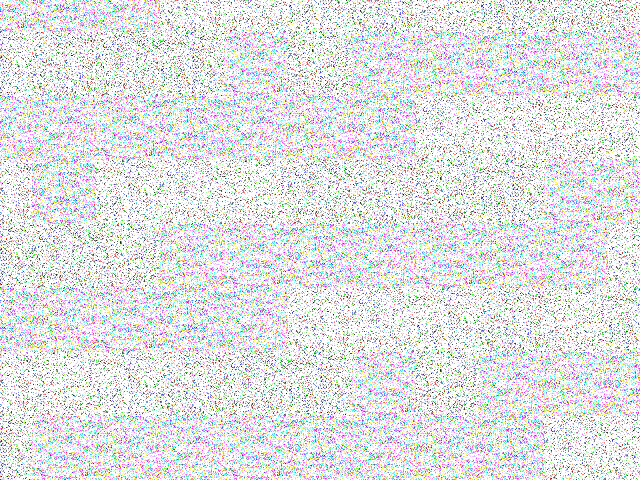

In [566]:
ts.plot()

<IPython.core.display.Javascript object>


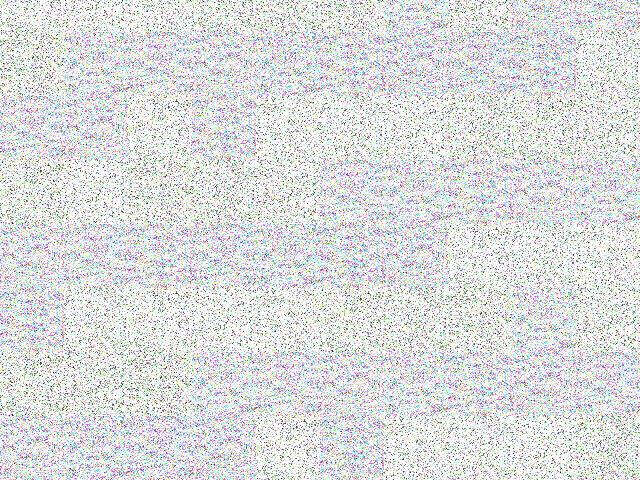

In [572]:
stun.plot()

In [574]:
stun


second         one       two
first                       
bar   A   0.216170 -0.164347
      B  -1.126913  0.021236
baz   A  -3.463809 -0.771894
      B  -5.763515 -1.608950
foo   A  -8.253172 -1.312048
      B  -9.709437  1.350015
qux   A -12.392963  2.696040
      B -12.829861  3.396407

In [575]:
stun = stun.cumsum()
stun


second         one       two
first                       
bar   A   0.216170 -0.164347
      B  -0.910743 -0.143111
baz   A  -4.374552 -0.915005
      B -10.138067 -2.523955
foo   A -18.391239 -3.836003
      B -28.100676 -2.485988
qux   A -40.493638  0.210052
      B -53.323500  3.606459

<IPython.core.display.Javascript object>


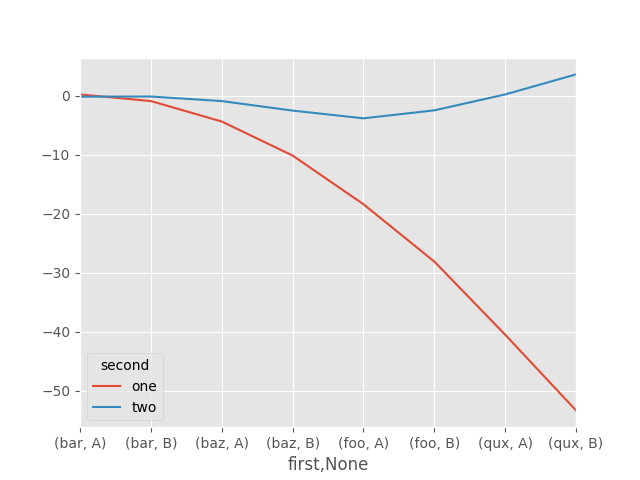

In [654]:
stun.plot()

In [589]:
tit = pd.read_csv('~/bigd/trypandas/titanic.csv')
tit.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


<IPython.core.display.Javascript object>


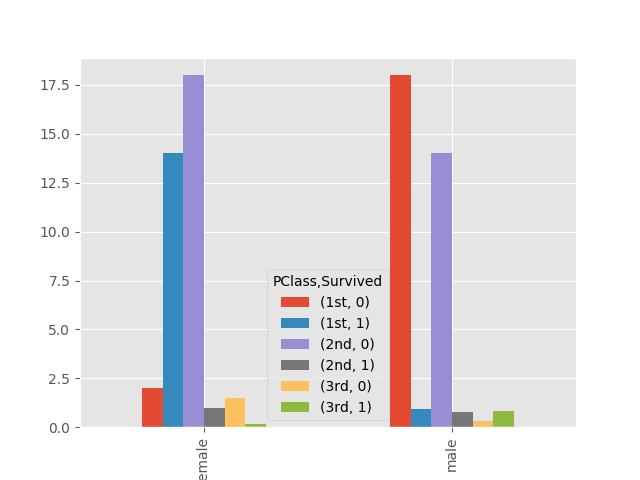

In [662]:
titpl = tit.pivot_table(index='Sex',
                          columns=['PClass', 'Survived'],
                          values='Age',
                          aggfunc='min'
                          )
# titpl = pd.DataFrame(tit.groupby(['Sex',
#                                   'Survived',
#                                   'PClass'])['Age'].min().dropna())
# titpl
titpl.plot(kind='bar')